# Importing libraries and the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# We have imported all dependencies
selected_features = ['grade_C','grade_D','grade_E',
        'grade_F','grade_G','total_rec_int',
        'total_pymnt_inv','funded_amnt_inv','sub_grade_B5',
        'sub_grade_B4','sub_grade_C5','sub_grade_C4','sub_grade_C3','sub_grade_D5','int_rate']
df = pd.read_csv('../Data/Mice Data/data_after_mice.csv') # read data set using pandas


df=df[selected_features]

fullData = df

target_col = ["int_rate"]
cat_cols= []
num_cols= list(set(list(fullData.columns))-set(cat_cols)-set(target_col))
num_cat_cols = num_cols+cat_cols



In [3]:
for var in num_cat_cols:
    if fullData[var].isnull().any()==True:
        fullData[var+'_NA']=fullData[var].isnull()*1
#Impute numerical missing values with mean
fullData[num_cols] = fullData[num_cols].fillna(fullData[num_cols].mean())
#Impute categorical missing values with -9999
fullData[cat_cols] = fullData[cat_cols].fillna(value = -9999)
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

features = list(set(list(fullData.columns))-set(target_col))
print(fullData[features].max())

fullData[features] = fullData[features]/fullData[features].max()
fullData[features]


sub_grade_D5           1.00
funded_amnt_inv    35000.00
sub_grade_B4           1.00
grade_F                1.00
sub_grade_B5           1.00
grade_G                1.00
sub_grade_C5           1.00
sub_grade_C4           1.00
grade_E                1.00
total_rec_int      24205.62
sub_grade_C3           1.00
total_pymnt_inv    57777.58
grade_C                1.00
grade_D                1.00
dtype: float64


,sub_grade_D5,funded_amnt_inv,sub_grade_B4,grade_F,sub_grade_B5,grade_G,sub_grade_C5,sub_grade_C4,grade_E,total_rec_int,sub_grade_C3,total_pymnt_inv,grade_C,grade_D
0,0.0,0.142143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035573,0.0,0.100935,0.0,0.0
1,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.017978,0.0,0.017459,1.0,0.0
2,0.0,0.068571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.024938,0.0,0.051986,1.0,0.0
3,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091273,0.0,0.211610,1.0,0.0
4,0.0,0.085714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.041687,0.0,0.056115,0.0,0.0
5,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026084,0.0,0.097467,0.0,0.0
6,0.0,0.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125012,0.0,0.140830,1.0,0.0
7,0.0,0.085714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.038757,0.0,0.068160,0.0,0.0
8,0.0,0.160000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.012185,0.0,0.011181,0.0,0.0
9,0.0,0.152857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022037,0.0,0.025431,0.0,0.0


# Splitting Training and Testing Data

In [4]:

features=list(set(list(fullData.columns))-set(target_col))
X = fullData[features].values
y = fullData[target_col].values
X_train, X_valid, y_train,y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

# Model Implementation without Cross Validation

Epoch 1/5
709820/709820 [==============================] - 29s 41us/step - loss: 2.5589 - mean_squared_error: 2.5589
Epoch 2/5
709820/709820 [==============================] - 28s 40us/step - loss: 1.1130 - mean_squared_error: 1.1130
Epoch 3/5
709820/709820 [==============================] - 31s 44us/step - loss: 1.0524 - mean_squared_error: 1.0524
Epoch 4/5
709820/709820 [==============================] - 33s 46us/step - loss: 1.0075 - mean_squared_error: 1.0075
Epoch 5/5
709820/709820 [==============================] - 24s 34us/step - loss: 0.9653 - mean_squared_error: 0.9653
5.9429808289499055


Text(0, 0.5, 'residuals')

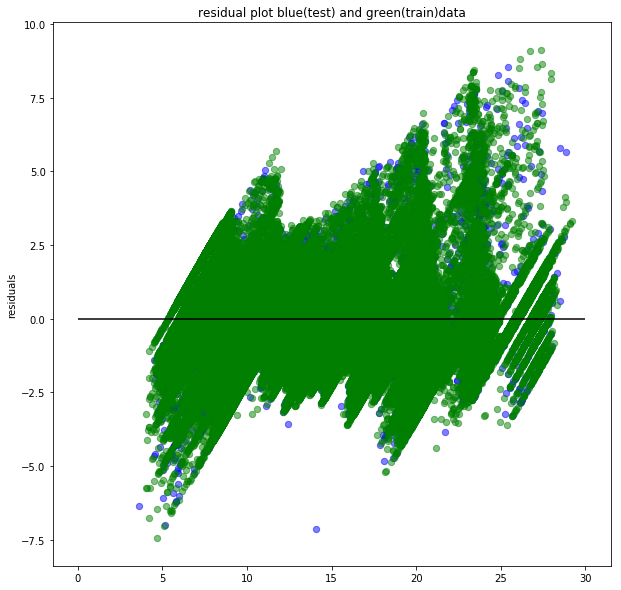

In [33]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import fabs
import matplotlib.pyplot as plt

cvscores =[]

model = Sequential()
model.add(Dense(50, input_dim=14, activation= "relu"))
model.add(Dense(25, activation= "relu"))
model.add(Dense(1, activation= "relu"))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train,batch_size=50, epochs=5,verbose=1)
pred= model.predict(X_valid)
mape=np.mean(np.abs((y_valid-pred) / y_valid)) * 100
print("Test Mape :"+str(mape))
print("Train Mape :"+str(mape))
plt.figure(figsize = (10,10))
plt.scatter(pred,pred-y_valid,c='b',s=40,alpha=0.5)
plt.scatter(model.predict(X_train),model.predict(X_train) - y_train,c='g',s=40,alpha=0.5)
plt.hlines(y=0,xmin=0,xmax=30)
plt.title('residual plot blue(test) and green(train)data')
plt.ylabel('residuals')

# Five Cross Validation

In [8]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import fabs
import matplotlib.pyplot as plt

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores =[]

for train_index, test_index in kf.split(X):
    X_trainD, X_testD = X[train_index], X[test_index]
    y_trainD, y_testD = y[train_index], y[test_index]
    model = Sequential()
    model.add(Dense(50, input_dim=14, activation= "relu"))
    model.add(Dense(25, activation= "relu"))
    model.add(Dense(1, activation= "relu"))
    model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
    model.fit(X_trainD, y_trainD,batch_size=50, epochs=10)
    pred= model.predict(X_valid)
    mape=np.mean(np.abs((y_valid-pred) / y_valid)) * 100
    cvscores.append(mape)

Epoch 1/10
709820/709820 [==============================] - 26s 36us/step - loss: 2.5775 - mean_squared_error: 2.5775
Epoch 2/10
709820/709820 [==============================] - 25s 36us/step - loss: 1.2517 - mean_squared_error: 1.2517
Epoch 3/10
709820/709820 [==============================] - 28s 40us/step - loss: 1.1425 - mean_squared_error: 1.1425
Epoch 4/10
709820/709820 [==============================] - 28s 39us/step - loss: 1.0667 - mean_squared_error: 1.06670s - loss: 1.0672 - mean_squared
Epoch 5/10
709820/709820 [==============================] - 26s 37us/step - loss: 1.0083 - mean_squared_error: 1.00831s - loss: 1.0091 - mean_s - ETA: 0s - los
Epoch 6/10
709820/709820 [==============================] - 26s 37us/step - loss: 0.9545 - mean_squared_error: 0.9545
Epoch 7/10
709820/709820 [==============================] - 28s 39us/step - loss: 0.9112 - mean_squared_error: 0.9112
Epoch 8/10
709820/709820 [==============================] - 26s 37us/step - loss: 0.8833 - mean_squa

# Calculating Mape for Training and Testing data, Plotting.

Test Mape :5.755833690333108
Train Mape :5.760238147347106


Text(0, 0.5, 'residuals')

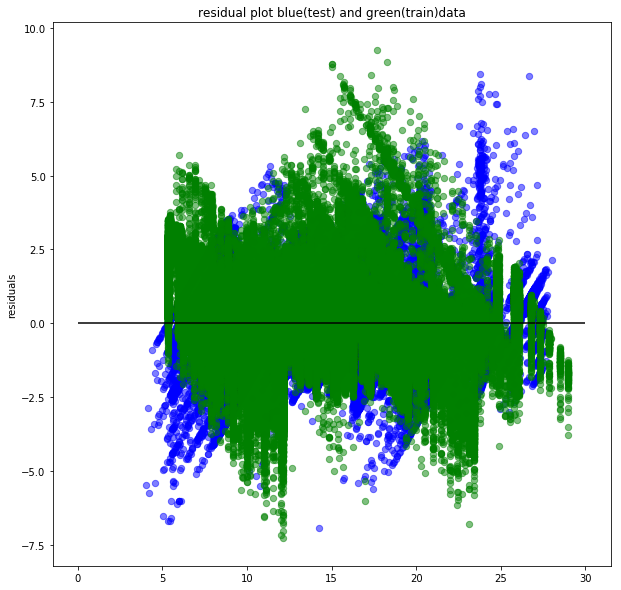

In [9]:
predtest= model.predict(X_valid)
mapeTest=np.mean(np.abs((y_valid-predtest) / y_valid)) * 100
predtrain= model.predict(X_train)
mapeTrain=np.mean(np.abs((y_train-predtrain) / y_train)) * 100

print("Test Mape :"+str(mapeTest))
print("Train Mape :"+str(mapeTrain))
plt.figure(figsize = (10,10))
plt.scatter(predtest,predtest-y_valid,c='b',s=40,alpha=0.5)
plt.scatter(y_train,predtrain - y_train,c='g',s=40,alpha=0.5)
plt.hlines(y=0,xmin=0,xmax=30)
plt.title('residual plot blue(test) and green(train)data')
plt.ylabel('residuals')

# Hyperparameter Tuning with GRIDSEARCHCV

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import fabs
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

cvscoresTest =[]
cvscoresTrain=[]
def baseline_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(50, input_dim=14, activation= "relu"))
    model.add(Dense(25, activation= "relu"))
    model.add(Dense(1, activation= "relu"))
    model.compile(loss= "mse" , optimizer=optimizer, metrics=["accuracy"])
    return model

estimatorF = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
optimizers = ['rmsprop', 'adam','SGD']

batch_size = [10, 20, 50]
epochs = [5, 10, 15]
param_grid = dict(optimizer=optimizers,batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=estimatorF,param_grid=param_grid)
grid_result = grid.fit(X_train.values, y_train.values)


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))